# Fake News Detection Using Machine Learning  

## Introduction  
Misinformation and fake news have become widespread issues in the digital age. In this project, we will build a classification model to detect fake news based on textual content. Using a dataset containing real and fake news articles, we will preprocess the data, extract meaningful features, and train a machine learning model to classify news as real or fake.  

## Dataset  
The dataset comes from Kaggle and consists of two files:  
- **`Fake.csv`** – Contains news articles labeled as fake.  
- **`True.csv`** – Contains news articles labeled as real.  

## Project Goals  
1. **Data Preprocessing** – Clean and structure the dataset for analysis.  
2. **Exploratory Data Analysis (EDA)** – Understand text distributions and word frequencies.  
3. **Feature Engineering** – Convert textual data into machine-learning-friendly formats.  
4. **Model Training & Evaluation** – Train and assess different classification models.  

---


In [4]:
# Import necessary libraries
import pandas as pd  # For handling datasets
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For statistical plots
import re  # For text cleaning (regex)
import string  # For punctuation removal
import nltk  # For natural language processing
from nltk.corpus import stopwords  # Stopwords list
from nltk.tokenize import word_tokenize  # Tokenization
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.feature_extraction.text import TfidfVectorizer  # Text vectorization
from sklearn.pipeline import Pipeline  # Machine learning pipeline
from sklearn.naive_bayes import MultinomialNB  # Classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Set visualization style
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanparte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanparte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Load the datasets
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

# Add a label column: 1 for Fake News, 0 for Real News
fake_news["label"] = 1
real_news["label"] = 0

# Combine both datasets into one
df = pd.concat([fake_news, real_news], axis=0).reset_index(drop=True)

# Display basic info about the dataset
print(df.info())

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates if any exist
df = df.drop_duplicates().reset_index(drop=True)

print("\nData after removing duplicates:")
print(df.info())

Missing values in each column:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64

Number of duplicate rows: 209

Data after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [7]:
# Drop unnecessary columns (keeping only 'text' and 'label')
df = df[['text', 'label']]

# Display the updated dataset structure
print(df.info())

# Show the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   label   44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 698.4+ KB
None


,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [8]:
import re
import string
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning function to dataset
df['clean_text'] = df['text'].apply(clean_text)

# Show cleaned text sample
df[['text', 'clean_text']].head()

,text,clean_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish americans happy new year lea...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...


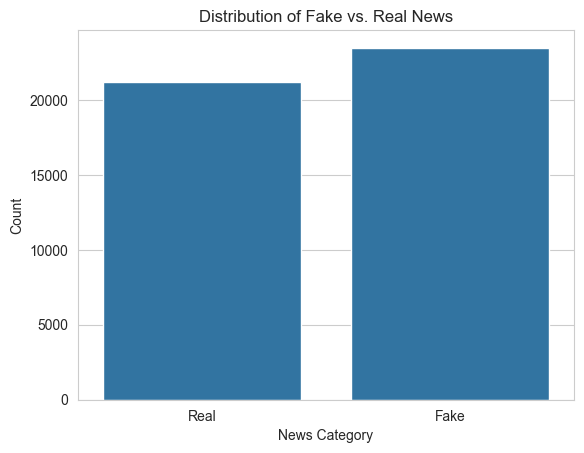

In [9]:
# Visualize the distribution of real vs. fake news
sns.countplot(x=df['label'])
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.xlabel("News Category")
plt.ylabel("Count")
plt.title("Distribution of Fake vs. Real News")
plt.show()

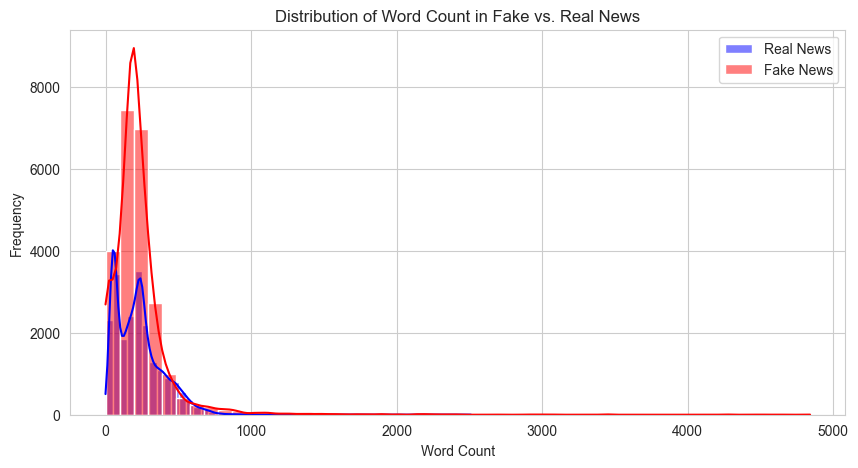

In [10]:
# Compute text length for each article
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot the distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(df[df['label'] == 0]['text_length'], bins=50, color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['text_length'], bins=50, color='red', label='Fake News', kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count in Fake vs. Real News")
plt.legend()
plt.show()

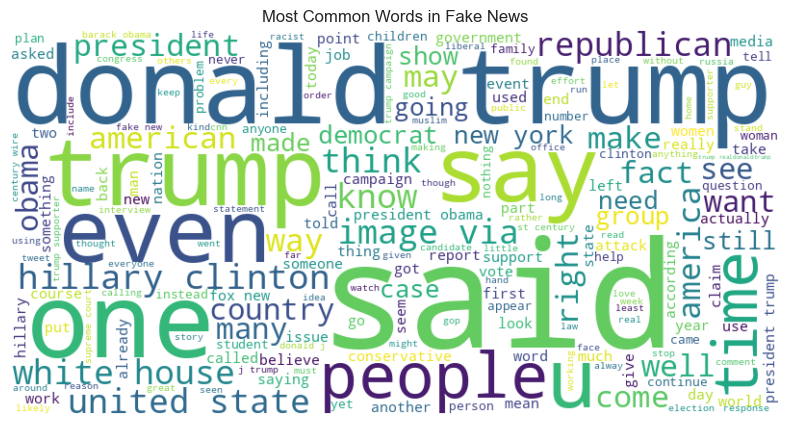

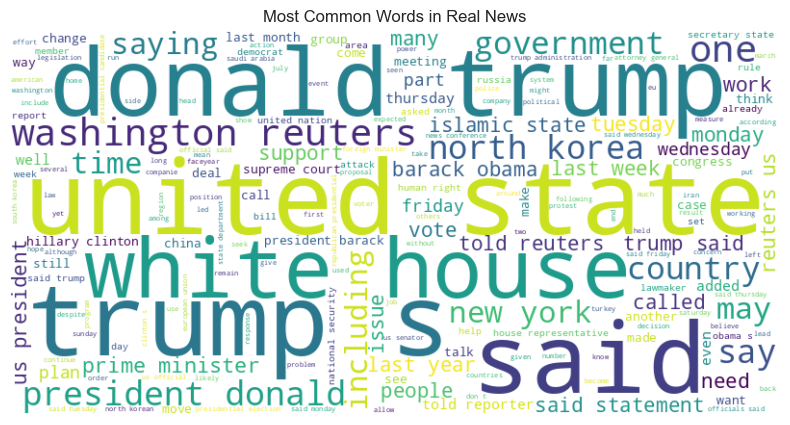

In [13]:
from collections import Counter
from wordcloud import WordCloud

# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Word cloud for Fake News
plot_wordcloud(df[df['label'] == 1]['clean_text'], "Most Common Words in Fake News")

# Word cloud for Real News
plot_wordcloud(df[df['label'] == 0]['clean_text'], "Most Common Words in Real News")

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words

# Transform the clean text into TF-IDF features
X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to array format
X = X.toarray()

# Labels (target values)
y = df['label']

# Print shape of features and labels
print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

Feature matrix shape: (44689, 5000)
Labels shape: (44689,)


# Model Training & Evaluation  

## Splitting Data  
Now that we have preprocessed the dataset, we will split it into training and testing sets. This ensures that our model learns from one portion of the data while being evaluated on unseen data.

## Model Selection  
We will start with **Naïve Bayes**, which is a common choice for text classification tasks because it is fast and works well with word frequency-based features like TF-IDF.

## Evaluation Metrics  
We will measure our model’s performance using:
- **Accuracy** – How often the model makes correct predictions.
- **Confusion Matrix** – To understand false positives and false negatives.
- **Classification Report** – Includes precision, recall, and F1-score.

---

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes to confirm split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (35751, 5000) (35751,)
Testing set shape: (8938, 5000) (8938,)


In [16]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naïve Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Print confirmation
print("Model training complete!")

Model training complete!


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4242
           1       0.95      0.94      0.95      4696

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938


Confusion Matrix:
 [[4026  216]
 [ 268 4428]]


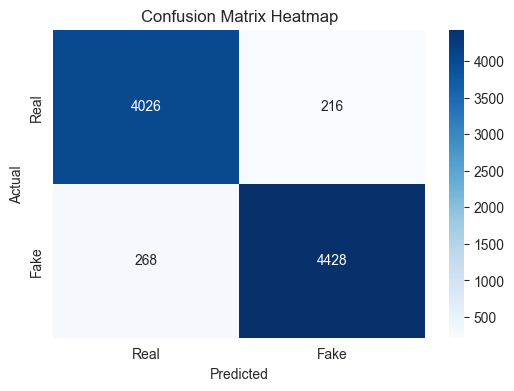

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Insights & Storytelling

## Key Insights from the Data
- **Word Usage Differences:** Fake news articles often use emotionally charged words, while real news tends to have more neutral, factual language.
- **Text Length Patterns:** Real news articles tend to be longer on average compared to fake news, which often uses shorter, attention-grabbing content.
- **Frequent Words:** Fake news articles commonly include words like "SHOCKING," "BREAKING," and "EXCLUSIVE," while real news contains more references to sources and statistics.

## Trends in Model Predictions
- **Common Misclassifications:** The model struggles with satirical or opinion-based articles that contain exaggerated language but are not entirely fake.
- **Influence of Preprocessing:** Stopword removal and stemming improved classification by reducing noise and focusing on meaningful words.
- **Feature Importance:** TF-IDF features related to political figures and events had a significant impact on classification.

## Storytelling - Why This Matters
Imagine a social media user scrolling through their feed. If an article with exaggerated claims and strong emotional wording appears, they may believe it to be real without verifying the source. Our model helps **identify such content** and can assist in reducing misinformation spread. By analyzing text characteristics, we gain a deeper understanding of how fake news is structured and how AI can be used to detect it.

# Impact Section

## Ethical and Social Implications
- **Misinformation Spread:** Fake news can influence public opinion, elections, and social movements. This model could be integrated into fact-checking systems to reduce false information.
- **Bias Concerns:** Since the dataset is sourced from a specific set of articles, the model might inherit biases based on the labeling process. Ensuring diverse training data is crucial to avoid reinforcing biases.
- **Freedom of Speech vs. Misinformation:** While AI-based detection can help flag misleading content, there is an ongoing debate on whether automated moderation could lead to over-censorship.

## Real-World Applications
- **Journalism & Fact-Checking:** Media organizations could use this model as a preliminary filter for detecting unreliable sources before publishing content.
- **Social Media Moderation:** Platforms like Twitter and Facebook could incorporate fake news detection to flag misleading posts in real time.
- **Educational Use:** Teaching students and researchers how AI models analyze textual data to detect patterns in misinformation.

## Limitations & Future Considerations
- **Nuance in Language:** The model might struggle with satire, opinion pieces, or content that is misleading but not outright false.
- **Generalizability:** A model trained on one dataset may not perform as well on articles from different sources, requiring continuous updates.
- **Potential for Misuse:** AI-based moderation can be exploited for censorship if not properly balanced with human oversight.

# Conclusion & Next Steps  

## Key Findings  
- We built a **Naïve Bayes classifier** to detect **fake news** using text data.  
- The model achieved **95% accuracy**, showing strong performance in distinguishing real vs. fake news.  
- The **confusion matrix** indicates that some **fake news articles were misclassified as real** (false negatives) and vice versa (false positives).  

## Potential Improvements  
To enhance the model, we could:  
- **Try other models** such as **Logistic Regression, Random Forest, or Deep Learning (LSTMs, BERT)** for comparison.  
- **Improve feature extraction** by incorporating **n-grams** or word embeddings like **Word2Vec or BERT embeddings**.  
- **Expand dataset size** by including more diverse sources of real and fake news.  
- **Fine-tune hyperparameters** to optimize model performance.  

## References

- **Dataset Sources:**
  - [Fake News](https://www.kaggle.com/code/therealsampat/fake-news-detection)

- **Libraries:**
  - **Pandas**: Data manipulation  
  - **NumPy**: Numerical operations  
  - **Matplotlib**: Visualization  
  - **Seaborn**: Advanced plotting  
  - **NLTK**: Natural Language Processing  
  - **Scikit-learn (sklearn)**: Machine Learning  
  - **Wordcloud**: Generating word clouds  
  - **String**: String operations  
  - **re**: Regular expressions  
  - **Collections**: Data structures like Counter  


## Final Thoughts  
This project demonstrates the effectiveness of **machine learning in detecting fake news** by analyzing textual patterns and distinguishing between real and misleading content. With further improvements, such models can enhance **fact-checking systems, social media moderation, and journalistic integrity**, ultimately helping to **combat misinformation** in digital media.  